# Create Lund planes with uproot/pandas

Lund planes are a representation of the phase space of jets.



## List of modules

In [1]:
import ROOT
import uproot

import numpy as np
import scipy as sp
import pandas as pd
import awkward as ak

import matplotlib.pyplot as plt

Welcome to JupyROOT 6.24/06


# filename(s) to .root files of SoftDrop reclustered datsets

In [2]:
fileName = "samples/07-09-2021_58MB_Pt120_tune14_10k_SD/JetToyHIResultSoftDrop.root"

## Use uproot to obtain your root tree

Uproot loads in the datafile and converts it to a 'awkward Array' datastructure.
Awkward arrays are really useful. They work similarly to numpy arrays, but -- unlike numpy -- with awkward arrays you are allowed to have variable length sequences.


In [3]:
file = uproot.open(fileName)
tree = file['jetTreeSig']
branches = tree.arrays()

## Reform to a smaller sample set to use for the lund plane

For now I use data obtained from Recursive Soft Drop. In this reclustering algorithm, SoftDrop continues after finding its initial splitting until 

In [4]:
data_set = branches[['sigJetRecur_dr12',
                     'sigJetRecur_jetpt',
                     'sigJetRecur_z']]
df_recur = ak.to_pandas(data_set)
df_recur


"""
pd.plotting.scatter_matrix(df_recur.head(10**4),
                           alpha=0.4,
                           hist_kwds={'bins': 50},
                           figsize=(7, 7))
plt.show()
"""

"\npd.plotting.scatter_matrix(df_recur.head(10**4),\n                           alpha=0.4,\n                           hist_kwds={'bins': 50},\n                           figsize=(7, 7))\nplt.show()\n"

## Flatten arrays

Now I flatten the arrays to the point where I obtain a 1D array for each variable, filled with all the leading branch splittings of the jets.
In this case, splitting information is lost. 
$k_t$ is obtained by 
$$ (1 - z) \cdot p_{t,1} * \Delta_{12}$$

In [5]:

flat_dr = ak.flatten(ak.flatten(data_set["sigJetRecur_dr12"]))
flat_pt = ak.flatten(ak.flatten(data_set["sigJetRecur_jetpt"]))
flat_z = ak.flatten(ak.flatten(data_set["sigJetRecur_z"]))
flat_kt = (1-flat_z) * flat_pt * flat_dr

## Plot Lund plane

Now I plot the Lund plane accordingly.

In [40]:
def Lund_Plot(kts, rs, R=0.4):
    fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize = (12, 5), gridspec_kw={'width_ratios': [1, 1.5]})
    fig.patch.set_facecolor('white')
    ax[0].plot(np.log(R/rs),
            np.log(kts),'o', alpha=0.5, markersize=0.2)
    ax[0].set_xlabel(r'$\ln (R/\Delta R)$')
    ax[0].set_ylabel('ln(kt)')
    #plt.xlim(left=-0.5, right=5)
    #plt.ylim(bottom=-2, top=5)

    H, xedges, yedges = np.histogram2d(np.log(R/rs),
            np.log(kts), bins=20)
    im = ax[1].imshow(H.T, interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect=0.8)
    fig.colorbar(im, ax=ax[1])
    ax[1].set_xlabel(r'$\ln (R/\Delta R)$')
    ax[1].set_ylabel('ln(kt)')
    plt.tight_layout()
    plt.show()
    return

### First normally

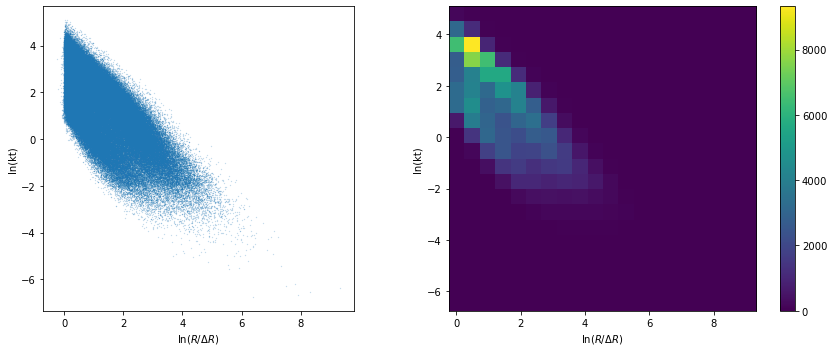

In [41]:
Lund_Plot(flat_kt, flat_dr)


## Cut at 130 GeV

Place a cut at 130 GeV to only obtain the hard scatterings

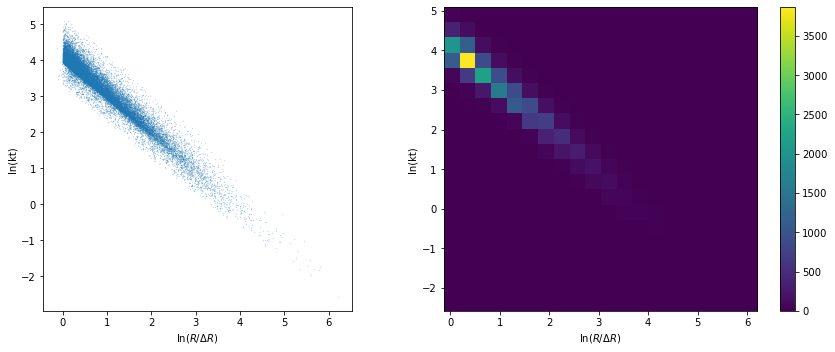

In [42]:
kts = []
rs = []

for i, pt in enumerate(flat_pt):
    if (pt > 130): #and (pt > 20):
        z = flat_z[i]
        dr12 = flat_dr[i]
        kts.append((1-z) * pt * dr12)
        rs.append(dr12)

kts = np.array(kts)
rs = np.array(rs)

Lund_Plot(kts,rs)

## Splittings versus $p_t$

Plot of the number of splittings versus pt.

## 

In [9]:
branches['sigJetPt']

<Array [[166, 119, 15.5], ... [123, 120]] type='5000 * var * float64'>

In [23]:
branches['sigJetRecur_nSD']

<Array [8, 7, 4] type='3 * float64'>

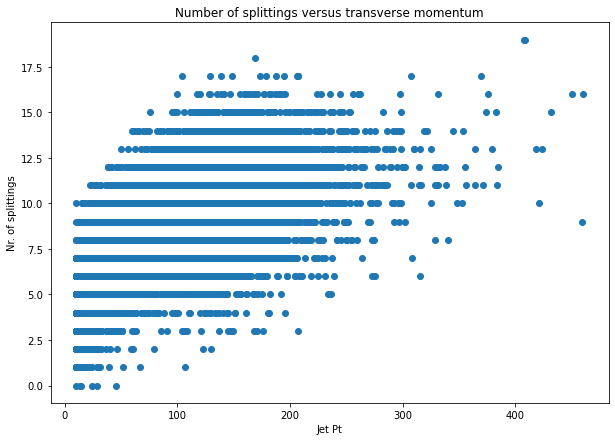

In [31]:
plt.figure(figsize=(10,7))
plt.scatter(ak.flatten(branches['sigJetPt']), ak.flatten(branches['sigJetRecur_nSD']))
plt.xlabel("Jet Pt")
plt.ylabel("Nr. of splittings")
plt.title("Number of splittings versus transverse momentum")
plt.show()